## Analyse von Twitterdatenset

In [2]:
import pandas as pd
import sklearn
import matplotlib
import numpy as np
import scipy
import os 
from pandas import read_csv
      
            
# Daten einlesen            
df = pd.read_csv('../data/Twitter/twitterdata.csv', sep=',', index_col=False, dtype='unicode')

/Users/nelesassor/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
daten = pd.DataFrame(df)
daten_string = daten 
# Data exploration

print(daten.head())

print(daten.shape)
#daten.describe()

       conversation_id                created_at favorite_count  \
0  1630941370302054401  2023-03-01T14:41:38.000Z              4   
1  1630938442312949761  2023-03-01T14:30:00.000Z              0   
2  1630932667238690816  2023-03-01T14:07:03.000Z              2   
3  1630923950078173185  2023-03-01T13:32:25.000Z              4   
4  1630915805386002432  2023-03-01T13:00:03.000Z              3   

                                           full_text  hashtags/0  \
0  Heute starten die @ESciTage 2023 in #Heidelber...  Heidelberg   
1  The #WorldFAIR case study on Population Health...   WorldFAIR   
2  What does the data discoverability landscape l...    FAIRdata   
3  CODATA Statement on the February 2023 Earthqua...      codata   
4  #NewDataset \nCetaceans in #TyrrhenianSea #Ion...  NewDataset   

      hashtags/1   hashtags/2   hashtags/3      hashtags/4   hashtags/5  ...  \
0           ZPID     escitage          FDM        opendata  openscience  ...   
1       FAIRdata  OpenScienc

## Analyse der verwendeten Hashtags bei #Fairdata posts

In [4]:
daten['hashtags/0'].nunique()
daten['hashtags/1'].nunique()
daten['hashtags/2'].nunique()
daten['hashtags/3'].nunique()
daten['hashtags/4'].nunique()

#print(pd.unique(daten[['hashtags/0']].values))
df2 = daten[['hashtags/0', 'hashtags/1','hashtags/2', 'hashtags/3', 'hashtags/4' ]].copy()
neuer_df = pd.DataFrame(daten['hashtags/0'])
neuer_df2 = pd.DataFrame(daten['hashtags/1'])
neue_spalte = pd.concat([daten['hashtags/0'], daten['hashtags/1'], daten['hashtags/2'], daten['hashtags/3'], daten['hashtags/4']], axis=0)
neue_spalte.to_csv('../data/hashtags/hashtagsMerged.csv')

print(neue_spalte)

countsALL = neue_spalte.value_counts()
print(countsALL)
countsALL.to_csv('../data/hashtags/hashtag_countALL.csv')


0       Heidelberg
1        WorldFAIR
2         FAIRdata
3           codata
4       NewDataset
           ...    
3995           NaN
3996           NaN
3997           NaN
3998           NaN
3999          taxa
Length: 20000, dtype: object
FAIRdata                   1603
OpenScience                 427
FAIR                        382
NewSpecies                  258
FAIRData                    196
                           ... 
materialsscience              1
DigitalSpecimen               1
digitalextendedspecimen       1
bestPractice                  1
CatenaX                       1
Length: 2227, dtype: int64


In [5]:
hashtag = df2['hashtags/0']
hashtag = pd.DataFrame(df2['hashtags/0'])

print(hashtag)

             hashtags/0
0            Heidelberg
1             WorldFAIR
2              FAIRdata
3                codata
4            NewDataset
...                 ...
3995                NaN
3996           FAIRdata
3997       OpenResearch
3998  CurrencyGradeData
3999         NewDataset

[4000 rows x 1 columns]


In [6]:
hashtag1 = df2['hashtags/1']
hashtag1 = pd.DataFrame(df2['hashtags/1'])


In [7]:
hashtagf2 = ['hashtags/2']
hashtag2 = pd.DataFrame(df2['hashtags/2'])


In [8]:
hashtag4 = df2['hashtags/4']
hashtag4 = pd.DataFrame(df2['hashtags/4'])
pd.set_option("display.max_rows", 100)

hashtag_data = pd.concat([hashtag, hashtag1, hashtag2, hashtag4], axis=0)
df3 = pd.DataFrame(hashtag_data)
#hashtag_data_clean = hashtag_data.drop(columns=['hashtags/1', 'hashtags/2', 'hashtags/4'])

print(df3)
print(df3.tail())
df3['hashtags/0'].nunique()

df4 = df3.pivot_table(index = ['hashtags/0'], aggfunc ='size')
print(df4)

counts = df3['hashtags/0'].value_counts()
print(counts)
counts.to_csv('../data/hashtags/hashtag_count.csv')


      hashtags/0 hashtags/1 hashtags/2 hashtags/4
0     Heidelberg        NaN        NaN        NaN
1      WorldFAIR        NaN        NaN        NaN
2       FAIRdata        NaN        NaN        NaN
3         codata        NaN        NaN        NaN
4     NewDataset        NaN        NaN        NaN
...          ...        ...        ...        ...
3995         NaN        NaN        NaN        NaN
3996         NaN        NaN        NaN        NaN
3997         NaN        NaN        NaN        NaN
3998         NaN        NaN        NaN        NaN
3999         NaN        NaN        NaN       taxa

[16000 rows x 4 columns]
     hashtags/0 hashtags/1 hashtags/2 hashtags/4
3995        NaN        NaN        NaN        NaN
3996        NaN        NaN        NaN        NaN
3997        NaN        NaN        NaN        NaN
3998        NaN        NaN        NaN        NaN
3999        NaN        NaN        NaN       taxa
hashtags/0
1255PalmRidge                                        1
1Patient1Recor

In [9]:
n = 10
df2['hashtags/0'].value_counts()[:n].index.tolist()

['FAIRdata',
 'NewSpecies',
 'FAIR',
 'OpenScience',
 'FAIRData',
 'codata',
 'EOSC',
 'DataValues',
 'data',
 'FDO2022']

In [10]:
n = 10
df2['hashtags/1'].value_counts()[:n].index.tolist()

['FAIRdata',
 'FAIR',
 'OpenScience',
 'data',
 'OpenData',
 'FAIRData',
 'fairdata',
 'Treatment',
 'openscience',
 'EOSC']

In [11]:
n = 10
df2['hashtags/2'].value_counts()[:n].index.tolist()

['FAIRdata',
 'OpenScience',
 'FAIR',
 'nature',
 'FAIRData',
 'opendata',
 'fairdata',
 'OpenData',
 'Biodiversity',
 'EOSC']

In [12]:
n = 10
df2['hashtags/3'].value_counts()[:n].index.tolist()

['FAIRdata',
 'OpenScience',
 'datascience',
 'Biodiversity',
 'conservation',
 'biodiversity',
 'FAIR',
 'Nature',
 'nature',
 'data']

In [13]:
n = 10
df2['hashtags/4'].value_counts()[:n].index.tolist()

['FAIRdata',
 'opendata',
 'conservation',
 'Conservation',
 'OpenScience',
 'FAIRData',
 'OpenData',
 'DataScience',
 'Biodiversity',
 'biodiversity']

In [14]:
# To change the column names, you can do:
countsALL = [('FAIRdata', 1603), ('OpenScience', 427), ('FAIR', 382), ('NewSpecies', 258), 
             ('FAIRData', 196), ('opendata', 157), ('data', 151), ('OpenData', 141), 
             ('EOSC', 137), ('fairdata', 129)]
df = pd.DataFrame(countsALL, columns=['Hashtag', 'Count'])
print(df.head(10))

       Hashtag  Count
0     FAIRdata   1603
1  OpenScience    427
2         FAIR    382
3   NewSpecies    258
4     FAIRData    196
5     opendata    157
6         data    151
7     OpenData    141
8         EOSC    137
9     fairdata    129


## Visualisierung

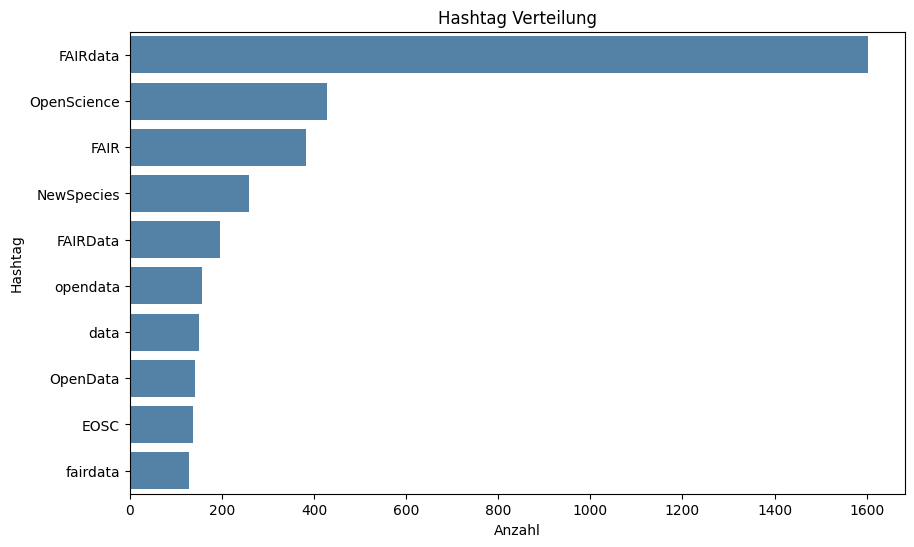

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

countsALL = df.sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Hashtag', data=df, color='steelblue')
plt.xlabel('Anzahl')
plt.ylabel('Hashtag')
plt.title('Hashtag Verteilung')
plt.savefig('../results/hashtag_verteilung')
plt.show()

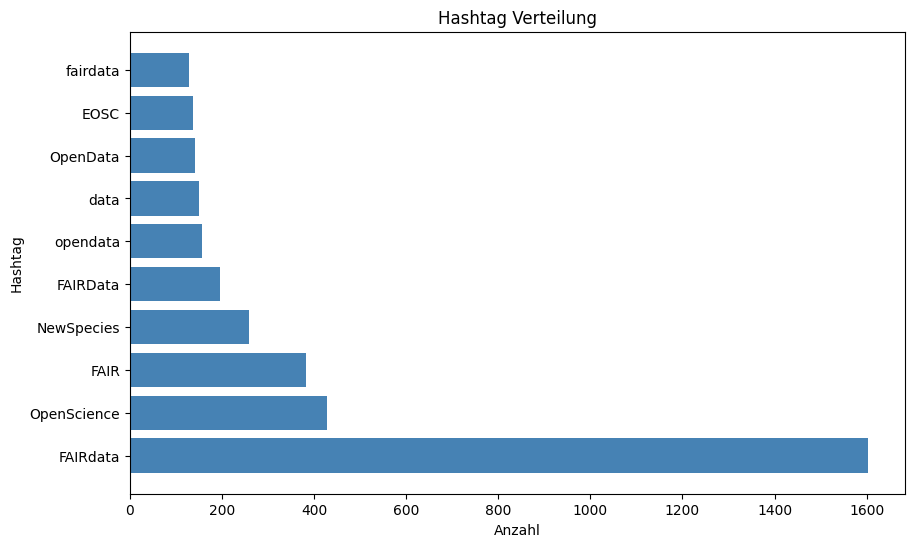

In [16]:
import matplotlib.pyplot as plt

countsALL = df.sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(countsALL['Hashtag'], countsALL['Count'], color='steelblue')
plt.xlabel('Anzahl')
plt.ylabel('Hashtag')
plt.title('Hashtag Verteilung')
plt.savefig('../results/hashtag_verteilung')
plt.show()